# Adsorption Isotherms Prelab
Keith Runyon

1.	Solutions of hemoglobin in a buffer of 0.1 M Tris-HCl (pH = 8.1) were prepared by mixing protein stock solution with a concentration of 20 mg Hb/ml with pure buffer.  The absorbance at a wavelength of 240 nm was then measured as a function of concentration.

Using the data recorded below, complete the table and develop a calibration equation that gives the hemoglobin concentration in mg/ml as a function of absorbance.

In [1]:
v_hb=[0,0.2,0.4,0.6,0.8,1]
v_buffer=[1,0.8,0.6,0.4,0.2,0]
c_hb_curve=[]
c_stock=20 #[mg/L]

molarity_buffer=0.1 #mol/L
MW_buffer=157.594 #g/mol
c_buffer=MW_buffer*molarity_buffer

sampleid=[]
for i in range(len(v_hb)):
    sampleid.append('CalCurve Sample {}'.format(i))
    c_hb_curve.append(v_hb[i]*c_stock/(v_buffer[i]+v_hb[i]))
    print('for {} concentration of Hb is {} mg/l'.format(sampleid[i],c_hb_curve[i],))  

for CalCurve Sample 0 concentration of Hb is 0.0 mg/l
for CalCurve Sample 1 concentration of Hb is 4.0 mg/l
for CalCurve Sample 2 concentration of Hb is 8.0 mg/l
for CalCurve Sample 3 concentration of Hb is 12.0 mg/l
for CalCurve Sample 4 concentration of Hb is 16.0 mg/l
for CalCurve Sample 5 concentration of Hb is 20.0 mg/l


### Develop Calibration Curve
Applying Beer's law we can setup a linear relationship by curvefitting.
for any sample i we have...
$C_{i}^{Hb} = Abs_{i}*\frac{C_{curve}}{Abs_{curve}}$

In [2]:
import numpy as np
#determine average absorbance 
abs_curve=[ [0    ,0    ,0    ,0],
            [0.738,0.665,0.714,0.7],
            [1.487,1.436,1.377,1.434],
            [2.194,2.162,2.128,2.186],
            [2.935,2.9  ,2.914,2.902],
            [3.669,3.67 ,3.678,3.652]]
abs_curve_avg=[np.average(row) for row in abs_curve]
for i in range(len(abs_curve_avg)):
    print('for a concentration of {}mg/L Hb, avg absorbance={}'.format(c_hb_curve[i],abs_curve_avg[i]))


for a concentration of 0.0mg/L Hb, avg absorbance=0.0
for a concentration of 4.0mg/L Hb, avg absorbance=0.70425
for a concentration of 8.0mg/L Hb, avg absorbance=1.4335
for a concentration of 12.0mg/L Hb, avg absorbance=2.1675
for a concentration of 16.0mg/L Hb, avg absorbance=2.91275
for a concentration of 20.0mg/L Hb, avg absorbance=3.66725


In [3]:
for i in range(len(c_hb_curve)):
    print('here is the original list')
    print('{:.2f}   |  {:.2f} '.format(c_hb_curve[i],abs_curve_avg[i]))
c_hb_curve,abs_curve_avg=(list(c) for c in zip(*sorted(zip(c_hb_curve,abs_curve_avg))))
#reference  http://stackoverflow.com/questions/13668393/python-sorting-two-lists
print('\n\n\n')
for i in range(len(c_hb_curve)):
    print('here is the sorted list')
    print('{:.2f}   |  {:.2f} '.format(c_hb_curve[i],abs_curve_avg[i]))

here is the original list
0.00   |  0.00 
here is the original list
4.00   |  0.70 
here is the original list
8.00   |  1.43 
here is the original list
12.00   |  2.17 
here is the original list
16.00   |  2.91 
here is the original list
20.00   |  3.67 




here is the sorted list
0.00   |  0.00 
here is the sorted list
4.00   |  0.70 
here is the sorted list
8.00   |  1.43 
here is the sorted list
12.00   |  2.17 
here is the sorted list
16.00   |  2.91 
here is the sorted list
20.00   |  3.67 


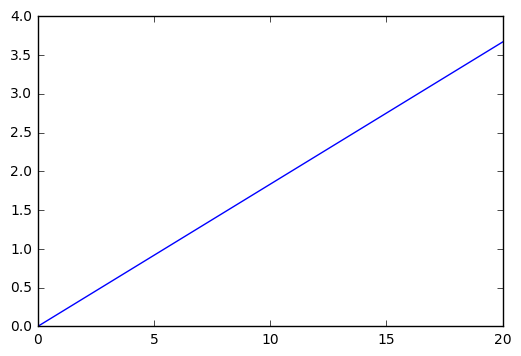

0.183541071429 -0.0212023809524


In [4]:
slope,intercept=np.polyfit(c_hb_curve,abs_curve_avg,1)
x=c_hb_curve
y=[slope*x for x in c_hb_curve]

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()
print(slope,intercept)


now we have to force the curvefit
**the curvefit doesn't allow me to set y=0 and I don't have access to excel right now so this is the best i can do**

# Problem 2

In [8]:
v_hb2=[     0,  0.6,  1.2,  1.8,  2.4, 3] #ml
v_buffer2=[ 3,  2.4,  1.8,  1.2,  0.6, 0]#ml
v_total2=[ s+b for s,b in zip(v_hb2,v_buffer2)]
print(v_total2)
c_stock2=20 #[mg/L]
molarity_buffer2=1 #mol/L
MW_buffer2=157.594 #g/mol
c_buffer2=MW_buffer2*molarity_buffer2
c_hb_i2=[]
sampleid2=[]
for i in range(len(v_hb2)):
    sampleid2.append('Prob2 Sample {}'.format(i))
    c_hb_i2.append(v_hb2[i]*c_stock2/(v_buffer2[i]+v_hb2[i]))
    print('for {} Ci of Hb is {} mg/ml'.format(sampleid2[i],c_hb_i2[i]))  

[3, 3.0, 3.0, 3.0, 3.0, 3]
for Prob2 Sample 0 Ci of Hb is 0.0 mg/ml
for Prob2 Sample 1 Ci of Hb is 4.0 mg/ml
for Prob2 Sample 2 Ci of Hb is 8.0 mg/ml
for Prob2 Sample 3 Ci of Hb is 12.0 mg/ml
for Prob2 Sample 4 Ci of Hb is 16.0 mg/ml
for Prob2 Sample 5 Ci of Hb is 20.0 mg/ml


In [12]:
import numpy as np
#determine average absorbance 
abs_f2=[0,0.504,1.076,1.615,2.242,2.836]
print('''with Beer's Law can use the slope equation to determine concentration 
\nof the protein once it has reached equilibrium w.resin''')
c_hb_f=[]
dc_hb2=[]
for i in range(len(abs_f2)):
    c_hb_f2.append(slope*abs_f2[i])
    print('for {} Cf of Hb is {} mg/mL'.format(sampleid2[i],c_hb_f2[i]))
    dc_hb2.append(c_hb_i2[i]-c_hb_f[i])

with Beer's Law can use the slope equation to determine concentration 

of the protein once it has reached equilibrium w.resin
for Prob2 Sample 0 Cf of Hb is 0.0 mg/mL


IndexError: list index out of range

# Problem 3
Starting with Beer's law we get the fit    
    $$ \frac{C_{sample i}} {A_{sample i}} = \frac{C_{c fit}} {A_{c fit}}$$
therefore to get the actual concentration based on the absorbance we can use
    $$ C_{sample i} =  A_{sample i}* \frac{C_{c fit}} {A_{c fit}}$$


Now we can go back and double check out answer and we should have the same slope as before

In [ ]:
slope2,intercept2=np.polyfit(abs_f2,c_hb_f2,1)

x=abs_f2
y=c_hb_f2
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()
print(slope2,intercept2)

slope is almost identical=>pass

also,as stated above the y-intercept is just error, and is approximately 0.

In [ ]:
dC2=[]
print('Protein Concentration Drop due to adsorbance')
for i in range(len(c_hb_f2)):
    dC2.append(c_hb_i2[i]-c_hb_f2[i])
    print('{} => dC => {} [mg/mL] Hb '''.format(sampleid2[i],dC2[i]))

M_hb_adsorbed=[]
print('\nProtein mass adsorbed by resin per sample')
for i in range(len(c_hb_f2)):
    #Mabsorbed=(dC[mg/mL])*(Vol[mL])*(1L/1000mL)
    M_hb_adsorbed.append(dC2[i]*v_total2[i])
    print('{} => M_Hb absobed => {} [mg] Hb'.format(sampleid2[i],M_hb_adsorbed[i]))


These numbers look realistic, so now we can calculate Q    

$Q=\frac{M_{absorbed}^{Hb}[mg] }{V_{resin}[mg]}$

In [ ]:
vres=[0.3,0.3,0.3,0.3,0.3,0.3]#0.3 mL of resin per sample
q=[]
for i in range(len(dC2)):
    q.append(M_hb_adsorbed[i]/vres[i]/100)
    print('for sample {} Q = {} [mg Hb/mL Resin]'.format(sampleid2[i],q[i]) )
    #C_over_Q2.append(c_hb_out[i]) / q[i]

In [ ]:
y=c_hb_f2
x=[slope*x for x in c_hb_f2]

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()
print(slope2,intercept2)

In [ ]:
#ref:http://www2.mpia-hd.mpg.de/~robitaille/PY4SCI_SS_2014/_static/15.%20Fitting%20models%20to%20data.html
#http://stackoverflow.com/questions/31943169/how-to-fit-non-linear-datas-in-python

from scipy.optimize import curve_fit
#1 setup the equation

def Langmiur(C, Qmax,k):   
    return( Qmax*C/(k+C) )
x=c_hb_f2
y=q
Lang_opt, Lang_cov = curve_fit(Langmiur,x,y)
print('Here are the curvefit variables from the Langmiur Isotherm\n{}'.format(Lang_opt))
print('here are the residuals from the least squares curve firt\n{}'.format(Lang_cov))
# Performing sum of squares
Qmax = Lang_opt[0]
k = Lang_opt[1]
print('From Langmiur Isotherm \n\n     Qmax = {}\n     k    = {}'.format(round(Qmax,2),round(k,2)))



In [7]:
def Freundlich(C,k,n):   
    return( k*np.power(C,1/n) )

x=np.array(c_hb_f2)
y=np.array(q)

Freund_opt, Freund_cov = curve_fit(Freundlich,x,y)
print('Here are the curvefit variables from the Langmiur Isotherm\n{}'.format(Lang_opt))
print('here are the residuals from the least squares curve firt\n{}'.format(Lang_cov))
# Performing sum of squares
k = Freund_opt[0]
n = Freund_opt[1]
print('From Freundlich Isotherm \n\n     a = {} [mg Hb absorbed/mL resin]\n     n    = {}'.format(round(Qmax,2),round(k,2)))


NameError: name 'q' is not defined

I wrote n instead for b because that matches the textbook    
$Freundlich=>Q=a*C^{1/n}$

* given how close they are I would call for more data before making a decision on which one was best
* 

In [ ]:
xp=[]
xplinear=[]

ypLinear=[]
ypLangmiur=[]
ypFreundlich=[]


for i in range(len(c_hb_f2)):
    xp.append(c_hb_f2[i])
    xplinear.append(abs_f2[i]*slope)
    ypLinear.append(q[i])
    ypLangmiur.append(Qmax*xp[i]/(k+xp[i]))
    ypFreundlich.append( 1.79*np.power(xp[i],1/n) )

import matplotlib.pyplot as plt
real,=plt.plot(c_hb_f2,q,'o',label="$Real Data$")
#plt.plot(x,y)
lin,=plt.plot(xp,ypLinear,label="$Linear Fit$")
lang,=plt.plot(xp,ypLangmiur,label="$Langmiur Isotherm$")
freu,=plt.plot(xp,ypFreundlich,label="$Freundlich Isotherm$")

#time,=plt.plot(Time,label="Time Elapsed [kg/s]")
plt.legend(bbox_to_anchor=(0., 1., 1., .102), loc=2,
           ncol=2, mode="expand", borderaxespad=0.)
#plt.axes.x_label("Cf [mg/L]")
#plt.axes.y_label("Q [mg Hb/mL Resin]")
plt.show()
print(slope2,intercept2)

The linear fit is the best for this dataset